# Create PCoA plot in Emperor with CSCS distance matrix

**Author**: Madeleine Ernst (mernst@ucsd.edu) <br>
**Edited by**: - <br>
**Use case**: Takes CSCS distance matrix output from CSCS_DistanceMatrix.ipynb and creates a PCoA plot in Emperor with provided metadata. <br>
**Input file format**: <br>
<ul>
<li>**Distance matrix** (.txt) output from CSCS_DistanceMatrix.ipynb </li>
<li>**Feature table** (.csv) with features in rows and samples in columns. This corresponds to the MZmine output table, selecting only features with associated MS2 data. </li> 
<li>**Metadata table** (.csv) file with sample names in rows and associated metadata in columns. </li>
</ul>
**Outputs**: 2D PCoA and Emperor plot using CSCS as distance metric. <br>
**Dependencies**: R version 3.4.2 (2017-09-28) and libraries stringr_1.2.0, ggplot2_2.2.1, igraph_1.1.2, spaa_0.2.2,  vegan_2.4-4, lattice_0.20-29 permute_0.9-4  

In [2]:
library(vegan)
library(spaa)
library(igraph) 
library(ggplot2)
library(stringr)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-4

Attaching package: ‘igraph’

The following object is masked from ‘package:vegan’:

    diversity

The following object is masked from ‘package:permute’:

    permute

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



Specify the name of your CSCS distance matrix

In [3]:
dist <- read.table("NamedDistanceMatrix.txt",sep="\t", header = T)
dist[1:5,1:5]
#colnames(dist)
#rownames(dist)
#dist[,1]

X,Af.T,Af.L,Af.F,Af.B
Af-T,0.000000000,0.02185740,0.02615090,0.002314799
Af-L,0.021857396,0.00000000,0.04440622,0.020174439
Af-F,0.026150897,0.04440622,0.00000000,0.015647398
Af-B,0.002314799,0.02017444,0.01564740,0.000000000
Ah-L,0.061715480,0.03477398,0.08705237,0.052800540


In [4]:
rownames(dist)  <- as.character(dist[,1])
rownames(dist) <- gsub("-", ".", rownames(dist))
dist[,1] <- rownames(dist)
colnames(dist) <- gsub("_", ".", colnames(dist))
colnames(dist)[1]  <- ""

cscs_mds <- cmdscale(dist[,-1],3)

dim(dist)
dist[1:5,1:5]
#colnames(dist)
#rownames(dist)

[1] 15 16

,,Af.T,Af.L,Af.F,Af.B
Af.T,Af.T,0.000000000,0.02185740,0.02615090,0.002314799
Af.L,Af.L,0.021857396,0.00000000,0.04440622,0.020174439
Af.F,Af.F,0.026150897,0.04440622,0.00000000,0.015647398
Af.B,Af.B,0.002314799,0.02017444,0.01564740,0.000000000
Ah.L,Ah.L,0.061715480,0.03477398,0.08705237,0.052800540


In [5]:
write.table(dist, "dist_Emperor_Alnus.txt", sep="\t", row.names = FALSE, quote = FALSE)

Specify the name of your feature table

In [6]:
fet <- read.csv("Alnus_quant.csv",check.names = T)
#colnames(fet)
fet[1:5,1:5]

row.ID,Af.T,Af.L,Af.F,Af.B
1,94356.47,1309.903,2473.208,165738.53
2,56500.42,3480.599,3442.195,156224.91
3,84356.67,89122.171,11819.555,74792.18
4,87234.57,945.145,21064.144,32355.47
5,56431.05,20685.250,6329.260,17404.02


Specify the name of your metadata table

In [7]:
met <- read.csv("Alnus_Metadata.csv", sep=";")

In [9]:
met$SampleNames <- gsub("-", ".", met$SampleNames)
#met$SampleNames <- gsub(".mzXML","",met$SampleNames)
met

SampleNames,Species,PlantPart
Af.T,Alnus_firma,Twigs
Af.L,Alnus_firma,Leaves
Af.B,Alnus_firma,Barks
Af.F,Alnus_firma,Fruits
Aj.T,Alnus_japonica,Twigs
Aj.L,Alnus_japonica,Leaves
Aj.F,Alnus_japonica,Fruits
Aj.B,Alnus_japonica,Barks
Ah.T,Alnus_hirtusa,Twigs
Ah.L,Alnus_hirtusa,Leaves


Check whether all sample names in your metadata table correspond to the sample names in the feature table

In [10]:
x <- which(colnames(fet) %in% met$SampleNames)
print(x)
length(x)

 [1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16


[1] 15

In [11]:
fet2 <- t(fet)
colnames(fet2) <- fet2[1,]
fet2 <- fet2[-1,]
fet2 <- cbind(rownames(fet2),fet2)
fet2 <- as.data.frame(fet2,stringsAsFactors=FALSE)
colnames(fet2)[1]  <- "SampleNames"
fet2[1:5,1:5]


dim(fet2)
is(fet2)

,SampleNames,1,2,3,4
Af.T,Af.T,94356.46559,56500.42225,84356.66516,87234.56531
Af.L,Af.L,1309.902808,3480.599078,89122.17053,945.145
Af.F,Af.F,2473.208147,3442.19533,11819.55489,21064.14375
Af.B,Af.B,165738.529,156224.9143,74792.17662,32355.46857
Ah.L,Ah.L,5294.440152,9836.52617,164211.6796,453.6797168


[1]  15 532

[1] "data.frame" "list"       "oldClass"   "vector"     "listOrNULL"

In [12]:
fetmet  <- merge(met,fet2,by="SampleNames")
fetmet$SampleNames <- gsub("_", ".", fetmet$SampleNames)
fetmet <- fetmet[match(rownames(dist), fetmet$SampleNames),]
length(which(fetmet$SampleNames %in% colnames(dist)))
fetmet[,1:5]
dim(fetmet)
dim(met)
dim(fet2)
colnames(fetmet)[1:133]
#write.csv(fetmet,"features_metadata_euphorbia.csv",row.names = F)

[1] 15

,SampleNames,Species,PlantPart,1,2
4,Af.T,Alnus_firma,Twigs,94356.46559,56500.42225
3,Af.L,Alnus_firma,Leaves,1309.902808,3480.599078
2,Af.F,Alnus_firma,Fruits,2473.208147,3442.19533
1,Af.B,Alnus_firma,Barks,165738.529,156224.9143
6,Ah.L,Alnus_hirtusa,Leaves,5294.440152,9836.52617
8,Ahv.B,Alnus_hirtusa_var_sibirica,Barks,187542.9919,28637.06209
7,Ah.T,Alnus_hirtusa,Twigs,48039.90882,30208.92459
5,Ah.F,Alnus_hirtusa,Fruits,1133.142265,962.3373106
9,Ahv.F,Alnus_hirtusa_var_sibirica,Fruits,23826.38372,10211.38025
11,Ahv.T,Alnus_hirtusa_var_sibirica,Twigs,62358.31766,55928.916


[1]  15 534

[1] 15  3

[1]  15 532

[1] "SampleNames" "Species"     "PlantPart"   "1"           "2"          
  [6] "3"           "4"           "5"           "6"           "7"          
 [11] "8"           "9"           "10"          "11"          "12"         
 [16] "13"          "14"          "15"          "16"          "17"         
 [21] "18"          "19"          "20"          "21"          "22"         
 [26] "23"          "24"          "25"          "26"          "27"         
 [31] "28"          "29"          "30"          "31"          "32"         
 [36] "33"          "34"          "35"          "36"          "37"         
 [41] "38"          "39"          "40"          "41"          "42"         
 [46] "43"          "44"          "45"          "46"          "47"         
 [51] "48"          "49"          "50"          "51"          "52"         
 [56] "53"          "54"          "55"          "56"          "57"         
 [61] "58"          "59"          "60"          "61"          "62"         
 [66] "63"          "64"          "65"          "66"          "67"         
 [71] "68"          "69"          "70"          "71"          "72"         
 [76] "73"          "74"          "75"          "76"          "77"         
 [81] "78"          "79"          "80"          "81"          "82"         
 [86] "83"          "84"          "85"          "86"          "87"         
 [91] "88"          "89"          "90"          "91"          "92"         
 [96] "93"          "94"          "95"          "96"          "97"         
[101] "98"          "99"          "100"         "101"         "102"        
[106] "103"         "104"         "105"         "106"         "107"        
[111] "108"         "109"         "110"         "111"         "112"        
[116] "113"         "114"         "115"         "116"         "117"        
[121] "118"         "119"         "120"         "121"         "122"        
[126] "123"         "124"         "125"         "126"         "127"        
[131] "128"         "129"         "130"

*For 2D visualization select a column in your feature table with corresponding metadata*

In [27]:
clustid1 <- fetmet[,which(colnames(fetmet)=="PlantPart")]
clustid1
clustid2 <- fetmet[,which(colnames(fetmet)=="Species")]
clustid2

[1] Twigs  Leaves Fruits Barks  Leaves Barks  Twigs  Fruits Fruits Twigs 
[11] Leaves Barks  Leaves Twigs  Fruits
Levels: Barks Fruits Leaves Twigs

[1] Alnus_firma                Alnus_firma               
 [3] Alnus_firma                Alnus_firma               
 [5] Alnus_hirtusa              Alnus_hirtusa_var_sibirica
 [7] Alnus_hirtusa              Alnus_hirtusa             
 [9] Alnus_hirtusa_var_sibirica Alnus_hirtusa_var_sibirica
[11] Alnus_hirtusa_var_sibirica Alnus_japonica            
[13] Alnus_japonica             Alnus_japonica            
[15] Alnus_japonica            
4 Levels: Alnus_firma Alnus_hirtusa ... Alnus_japonica

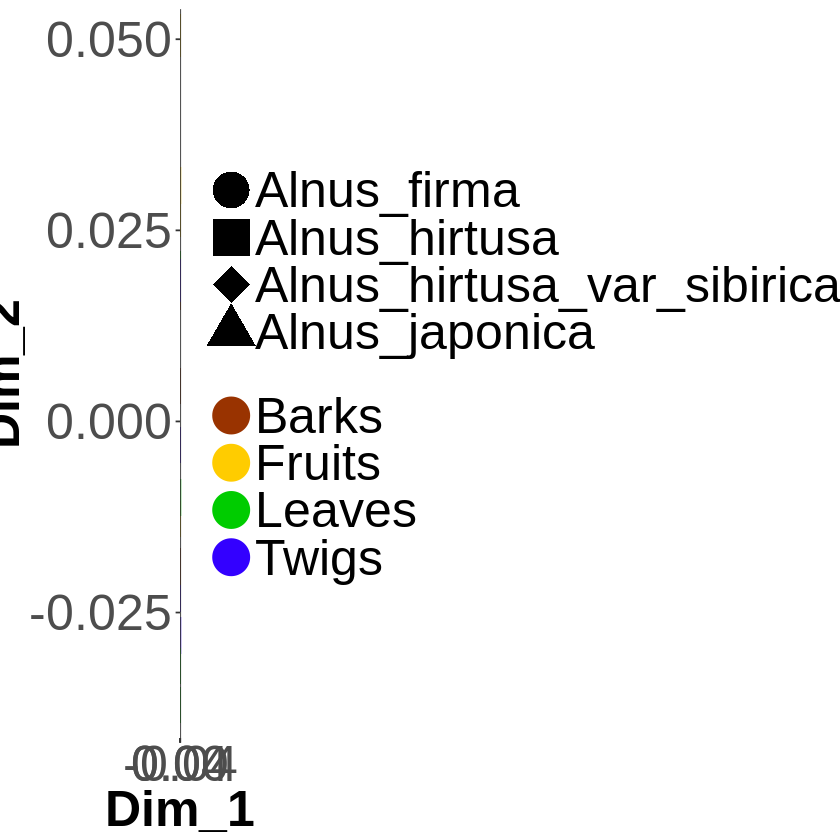

In [34]:
# to select different combinations of components do transf2$points[,c(1,3)]
mds_2D <- as.data.frame(cscs_mds[,1:2])
colnames(mds_2D) <- c("Dim_1", "Dim_2")
p <- ggplot(mds_2D, aes(Dim_1, Dim_2)) + 
    geom_point(aes(colour = factor(clustid1), shape = factor(clustid2)), size = 10) + 
    scale_shape_manual(values=c(16, 15, 18, 17))+
    scale_color_manual(values=c('#993300','#ffcc00', '#00cc00', '#3300ff'))+
    theme_bw() +
    theme(legend.title=element_blank()) + 
    theme(legend.text=element_text(size=30)) +
    theme(axis.text=element_text(size=30),
          axis.title=element_text(size=30, face="bold"))
print(p)
ggsave("PCoA_CSCS.png", p, width=23, height=15)